In [1]:
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ------------------------------------------------------------------------------
import multiprocessing
from itertools import product
import random


In [2]:
data = pd.read_csv("data mod.xlsx")

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Hdate,Unit price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 00:00:00,08:26:00,2.55,17850.0,21
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 00:00:00,08:26:00,2.75,17850.0,21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21


In [4]:
# Resumen del set de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539392 entries, 0 to 539391
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539392 non-null  int64  
 1   StockCode    539392 non-null  object 
 2   Description  539392 non-null  object 
 3   Quantity     539392 non-null  int64  
 4   InvoiceDate  539392 non-null  object 
 5   Hdate        539392 non-null  object 
 6   Unit price   539392 non-null  float64
 7   CustomerID   406787 non-null  float64
 8   Country      539392 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 37.0+ MB


In [96]:
# Cantidad de dimensiones

data.shape

(539392, 9)

In [5]:
data.rename(columns={"Unit price":"Precio"},inplace=True)

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Hdate,Precio,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 00:00:00,08:26:00,2.55,17850.0,21
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 00:00:00,08:26:00,2.75,17850.0,21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,21
...,...,...,...,...,...,...,...,...,...
539387,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 00:00:00,12:50:00,0.85,12680.0,8
539388,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 00:00:00,12:50:00,2.10,12680.0,8
539389,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 00:00:00,12:50:00,4.15,12680.0,8
539390,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 00:00:00,12:50:00,4.15,12680.0,8


C:\Users\Rodrigo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rodrigo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


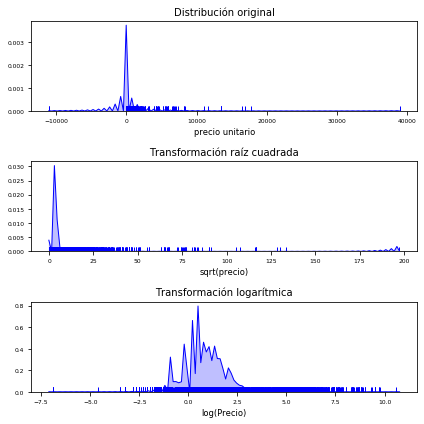

In [121]:
# Grafico la variable a predecir: Precio y se aplican 2 transformaciones 

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    data.Precio,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio unitario', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(data.Precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(data.Precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [134]:
# Estadistica descriptiva

descriptiva = data.describe()


In [139]:
descriptiva


,Quantity,Precio
count,539392.000000,539392.000000
mean,9.845912,4.632571
std,215.412651,96.984831
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


IndexError: index 3 is out of bounds for axis 0 with size 3

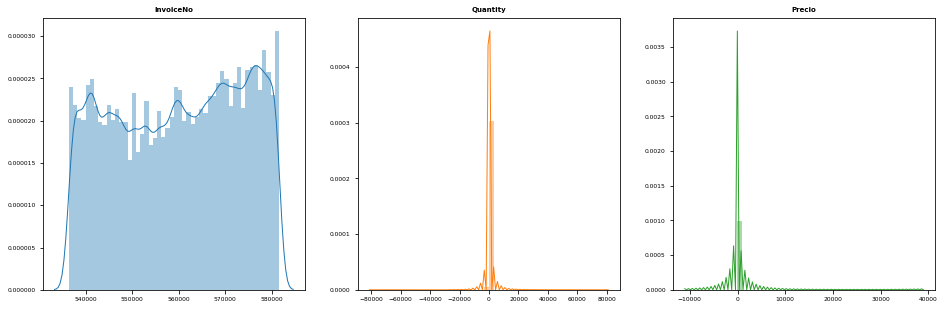

In [164]:
# Distribuciones variables cuantitativas

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.distplot(
        data[colum],
        hist    = True,
        rug     = False,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        kde_kws = {'shade': False, 'linewidth': 1},
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

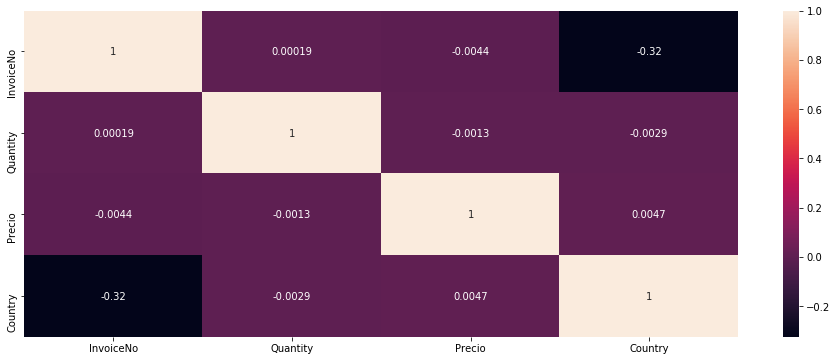

In [167]:
# Observemos la matriz de correlación, no existe asociación entre las variables

correlacion = data.corr()
sns.heatmap(correlacion, annot = True)
plt.show()

In [19]:
data = data.drop(['InvoiceDate'],axis=1)

In [7]:
# Descriptiva 

data.select_dtypes(include=['object']).describe()

,Description,InvoiceDate
count,539392,539392
unique,4042,305
top,WHITE HANGING HEART T-LIGHT HOLDER,2011-05-12 00:00:00
freq,2365,5323


In [11]:
data

,Description,Quantity,InvoiceDate,Precio,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 00:00:00,2.55,21
1,WHITE METAL LANTERN,6,2010-01-12 00:00:00,3.39,21
2,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 00:00:00,2.75,21
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 00:00:00,3.39,21
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 00:00:00,3.39,21
...,...,...,...,...,...
539387,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 00:00:00,0.85,8
539388,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 00:00:00,2.10,8
539389,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 00:00:00,4.15,8
539390,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 00:00:00,4.15,8


In [100]:
# Elimino varoable CustomerID dado que no aporta al modelo 

del(data['CustomerID'])

Text(0.5, 0.98, 'Distribución variables cualitativas')

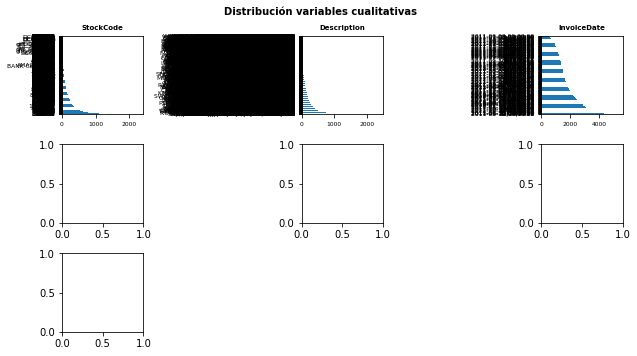

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold")

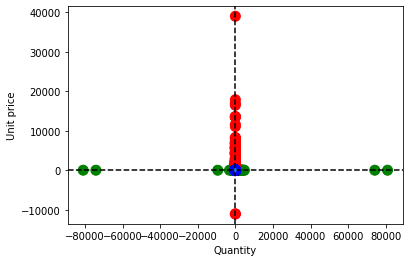

In [33]:
# Deteccion de anomalias

media1 = data['Quantity'].mean()
std1 = data['Quantity'].std()*2
media2 = data['Unit price'].mean()
std2 = data['Unit price'].std()*2
 
colors = ['blue']*len(data['Quantity'])
for index, x in enumerate(data['Quantity']):
    if abs(x-media1) > std1:
        colors[index] = 'green'
        
for index, x in enumerate(data['Unit price']):
    if abs(x-media2) > std2:
        colors[index] = 'red'

        
plt.scatter(data['Quantity'], data['Unit price'], s=100, color=colors)
plt.axhline(media1, color='k', linestyle='--')
plt.axvline(media2, color='k', linestyle='--')
 
v=media1     
u=media2    
b=std1     
a=std2    
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('Quantity')
plt.ylabel('Unit price')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x86aa99ffc8>,
 'caps': [<matplotlib.lines.Line2D at 0x86aa9a4d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x86aa99f988>],
 'medians': [<matplotlib.lines.Line2D at 0x86aa9a4e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x86aa9a7d48>],
 'means': []}

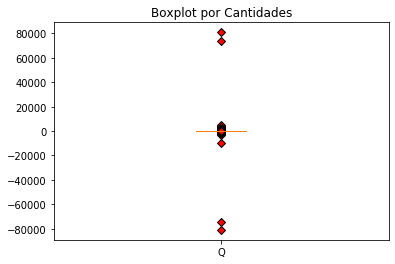

In [34]:
# Boxplot variable Q

red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Cantidades')
ax.boxplot(data['Quantity'], flierprops=red_diamond, labels=["Q"])


{'whiskers': [<matplotlib.lines.Line2D at 0x86aaae06c8>,
 'caps': [<matplotlib.lines.Line2D at 0x86aaacef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x86aaace5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x86aaaecf88>],
 'fliers': [<matplotlib.lines.Line2D at 0x86aaaf0988>],
 'means': []}

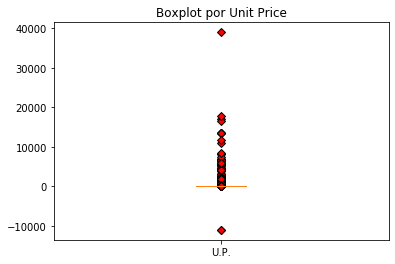

In [35]:
# Boxplot variable Precio

blue_diamond = dict(markerfacecolor='b', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Unit Price')
ax.boxplot(data['Unit price'], flierprops=red_diamond, labels=["U.P."])

In [20]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop('Precio', axis = 'columns'),
                                        data['Precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431513 entries, 325236 to 486191
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  431513 non-null  object
 1   Quantity     431513 non-null  int64 
 2   Country      431513 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [22]:
# Limpieza de datos y prerprocesado

# Missing values en variable ID Cliente, como no aporta al modelo se decide eliminar la variable.

data.isna().sum().sort_values()
data = data.drop(['CustomerID'],axis=1)

In [23]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Precio,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 00:00:00,2.55,21
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 00:00:00,3.39,21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 00:00:00,2.75,21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 00:00:00,3.39,21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 00:00:00,3.39,21
...,...,...,...,...,...,...,...
539387,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 00:00:00,0.85,8
539388,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 00:00:00,2.10,8
539389,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 00:00:00,4.15,8
539390,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 00:00:00,4.15,8


In [22]:
# Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')




In [23]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [30]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [25]:
data

,Description,Quantity,Precio,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,21
1,WHITE METAL LANTERN,6,3.39,21
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,21
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,21
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,21
...,...,...,...,...
539387,PACK OF 20 SPACEBOY NAPKINS,12,0.85,8
539388,CHILDREN'S APRON DOLLY GIRL,6,2.10,8
539389,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,8
539390,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,8


In [79]:
# Regresion lineal a traves de libreria scikit learn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x2,y)
r2=model.score(x2,y)
print('coeficiente de determinacion',r2)


# Como se podra observar a traves del coeficiente, el modelo no esta ajustado dado que no existe asociación entre cantidad y precio 

coeficiente de determinacion 1.7377305081556216e-06


In [86]:
# Repito el modelo pero con cross validation k=5

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x2,y,cv=5)
scores


array([-5.68688442e-05,  5.36571912e-06,  6.78086919e-07, -9.66036052e-05,
       -6.32926335e-05])